In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]]

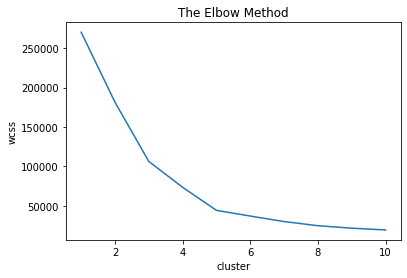

In [6]:
from sklearn.cluster import KMeans
list1=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42,)
    kmeans.fit(x)
    list1.append(kmeans.inertia_)
plt.plot(range(1,11),list1)
plt.title('The Elbow Method')
plt.xlabel('cluster')
plt.ylabel('wcss')
plt.show()

In [34]:
from sklearn.cluster import AffinityPropagation
affin=AffinityPropagation(convergence_iter=5)
y_means=affin.fit(x)
y_arr=y_means.predict(x)

In [35]:
tab=pd.DataFrame(dataset)
tab['clusterValue']=y_arr
tab

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusterValue
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


C:\Users\Lenovo\.conda\envs\hope\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


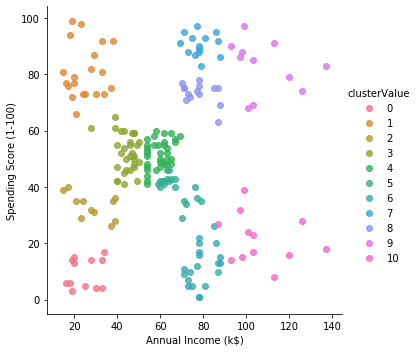

In [38]:
import seaborn as snb
faceset=snb.lmplot(data=tab,x=tab.columns[3],y=tab.columns[4],hue=tab.columns[5],fit_reg=False,legend=True,legend_out=True)
